In [1]:
train_path = './train.txt'
test_path = './test.txt'
submission_path = './submission.txt'

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [3]:
plt.style.use('ggplot')

In [4]:
%matplotlib inline

In [5]:
from tqdm import tqdm_notebook

# Load data

In [6]:
with open(train_path) as f:
    print f.readline()[:100]

1 8:0.90099 12:0.064688 13:0.94562 17:0.047949 21:0.30267 25:0.88089 27:0.029732 30:0.88748 34:0.772


In [7]:
with open(test_path) as f:
    print f.readline()[:100]

-1 5:0.99354 11:0.93136 12:0.064688 17:0.40437 18:0.57917 21:0.77818 27:0.69668 29:0.5611 30:0.2644 


In [8]:
def load_feautures(path):
    dicts = []
    labels = []
    with open(path) as f:
        for line in tqdm_notebook(f.readlines()):
            splits = line.split()
            labels.append(int(splits[0]))
            dicts.append(dict())
            for split in splits[1:]:
                f,v = split.split(':')
                dicts[-1][int(f)] = float(v)
    return dicts, labels

In [9]:
train_dicts, train_labels = load_feautures(train_path)

Widget Javascript not detected.  It may not be installed or enabled properly.


In [10]:
test_dicts, test_labels = load_feautures(test_path)

Widget Javascript not detected.  It may not be installed or enabled properly.


# Convert to dataframes

In [11]:
import pandas as pd

In [12]:
train_df = pd.DataFrame(train_dicts).fillna(0)
train_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.90099,0.0,0.0,...,0.0,0.0,0.0,0.50430,0.0,0.0,0.046567,0.00000,0.67177,0.0
1,0.0,0.0,0.00000,0.0,0.0,0.00000,0.0000,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.55425,0.0,0.0,0.046567,0.00000,0.57433,0.0
2,0.0,0.0,0.85361,0.0,0.0,0.99392,0.0000,0.74949,0.0,0.0,...,0.0,0.0,0.0,0.45057,0.0,0.0,0.046567,0.00000,0.80732,0.0
3,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.41013,0.0,0.0,0.046567,0.61889,0.88279,0.0
4,0.0,0.0,0.00000,0.0,0.0,0.00000,0.8087,0.00000,0.0,0.0,...,0.0,0.0,0.0,0.50395,0.0,0.0,0.046567,0.61889,0.82378,0.0


In [13]:
test_df = pd.DataFrame(test_dicts).fillna(0)
test_df.head()

,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [14]:
a = set(train_df.columns)
b = set(test_df.columns)
print len(a.intersection(b))
print b.difference(a), 'are not contained in train dataset'
for val in list(b.difference(a)):
    del test_df[val]
test_df.head()

585
set([288, 512, 482, 67, 293, 391, 501, 217, 635, 156]) are not contained in train dataset


,1,2,3,4,5,6,7,8,9,10,...,691,692,693,694,695,696,697,698,699,700
0,0.0,0.0,0.0,0.0,0.99354,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.41983,0.055105,0.0,0.0,0.046567,0.0,0.50870,0.0
1,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.43373,0.055676,0.0,0.0,0.046567,0.0,0.29021,0.0
2,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.7938,...,0.0,0.0,0.30737,0.059910,0.0,0.0,0.046567,0.0,0.48511,0.0
3,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.32031,0.058858,0.0,0.0,0.046567,0.0,0.72621,0.0
4,0.0,0.0,0.0,0.0,0.00000,0.0,0.0,0.0,0.0,0.0000,...,0.0,0.0,0.34900,0.057773,0.0,0.0,0.046567,0.0,0.75185,0.0


In [15]:
train_labels = np.array(train_labels)
test_labels = np.array(test_labels)

# See data

In [16]:
from sklearn.manifold import TSNE

In [51]:
train_mask = np.random.choice(train_df.shape[0], 5000)
test_mask = np.random.choice(test_df.shape[0], 5000)

In [52]:
tsne = TSNE(verbose=True)
z_data = tsne.fit_transform(train_df.ix[train_mask].append(test_df.ix[test_mask]))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.881763
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.387634
[t-SNE] Error after 325 iterations: 1.387634


[]

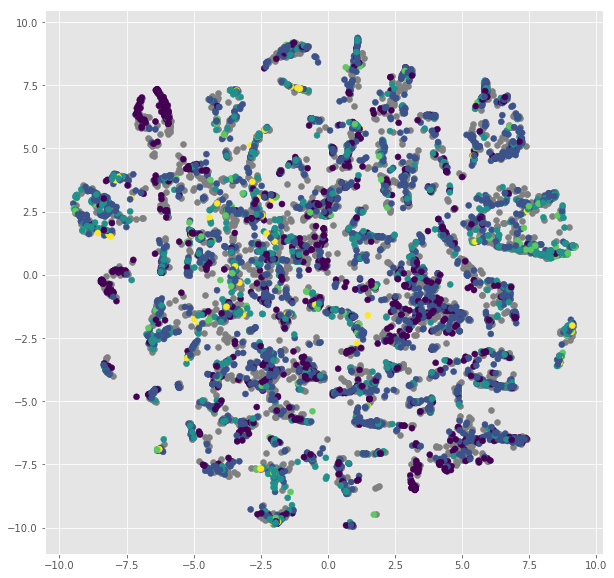

In [53]:
plt.figure(figsize=(10,10))
plt.scatter(z_data[5000:,0], z_data[5000:,1], c='gray')
plt.scatter(z_data[:5000,0], z_data[:5000,1], c=train_labels[train_mask])
plt.plot()

# Semisupervised

In [17]:
from keras.layers import Input, Dense
from keras.models import Model

Using TensorFlow backend.


In [18]:
from keras import regularizers

In [19]:
from keras.callbacks import TensorBoard

In [36]:
input_feature = Input(shape=(585,))

In [42]:
encoded = Dense(128, activation='relu')(input_feature)
encoded = Dense(64, activation='relu')(encoded)
encoded = Dense(32, activation='relu')(encoded)

decoded = Dense(64, activation='relu')(encoded)
decoded = Dense(128, activation='relu')(decoded)
decoded = Dense(585, activation='sigmoid')(decoded)

# Models

In [43]:
# this model maps an input to its reconstruction
autoencoder = Model(input_feature, decoded)

In [44]:
# this model maps an input to its encoded representation
encoder = Model(input_feature, encoded)

In [45]:
autoencoder.compile(optimizer='adadelta', loss='binary_crossentropy')

# Train

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test = train_test_split(train_df.append(test_df))
X_train = X_train.as_matrix()
X_test = X_test.as_matrix()

In [46]:
autoencoder.fit(X_train, X_train,
                nb_epoch=100,
                batch_size=256,
                shuffle=True,
                validation_data=(X_test, X_test),
                callbacks=[TensorBoard(log_dir='/tmp/autoencoder')])

Train on 129652 samples, validate on 43218 samples
Epoch 1/100
129652/129652 [==============================] - 5s - loss: 0.4007 - val_loss: 0.3375
Epoch 2/100
129652/129652 [==============================] - 5s - loss: 0.3158 - val_loss: 0.3016
Epoch 3/100
129652/129652 [==============================] - 5s - loss: 0.2918 - val_loss: 0.2843
Epoch 4/100
129652/129652 [==============================] - 5s - loss: 0.2802 - val_loss: 0.2764
Epoch 5/100
129652/129652 [==============================] - 5s - loss: 0.2719 - val_loss: 0.2716
Epoch 6/100
129652/129652 [==============================] - 5s - loss: 0.2654 - val_loss: 0.2620
Epoch 7/100
129652/129652 [==============================] - 5s - loss: 0.2599 - val_loss: 0.2569
Epoch 8/100
129652/129652 [==============================] - 5s - loss: 0.2551 - val_loss: 0.2533
Epoch 9/100
129652/129652 [==============================] - 5s - loss: 0.2515 - val_loss: 0.2508
Epoch 10/100
129652/129652 [==============================] - 5s - 

129652/129652 [==============================] - 5s - loss: 0.2169 - val_loss: 0.2177
Epoch 84/100
129652/129652 [==============================] - 5s - loss: 0.2168 - val_loss: 0.2169
Epoch 85/100
129652/129652 [==============================] - 5s - loss: 0.2167 - val_loss: 0.2177
Epoch 86/100
129652/129652 [==============================] - 5s - loss: 0.2166 - val_loss: 0.2169
Epoch 87/100
129652/129652 [==============================] - 5s - loss: 0.2165 - val_loss: 0.2163
Epoch 88/100
129652/129652 [==============================] - 5s - loss: 0.2164 - val_loss: 0.2165
Epoch 89/100
129652/129652 [==============================] - 5s - loss: 0.2163 - val_loss: 0.2161
Epoch 90/100
129652/129652 [==============================] - 5s - loss: 0.2161 - val_loss: 0.2161
Epoch 91/100
129652/129652 [==============================] - 5s - loss: 0.2161 - val_loss: 0.2160
Epoch 92/100
129652/129652 [==============================] - 5s - loss: 0.2159 - val_loss: 0.2161
Epoch 93/100
129652/129

In [47]:
autoencoder.save('./autoencoder_stack')

# See data

In [34]:
from sklearn.manifold import TSNE

In [35]:
encoded_train = encoder.predict(train_df.as_matrix())
encoded_test = encoder.predict(test_df.as_matrix())

In [36]:
train_mask = np.random.choice(encoded_train.shape[0], 5000)
test_mask = np.random.choice(encoded_test.shape[0], 5000)

In [41]:
tsne = TSNE(verbose=True)
z_data = tsne.fit_transform(np.vstack([encoded_train[train_mask], encoded_test[test_mask]]))

[t-SNE] Computing pairwise distances...
[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 4.407095
[t-SNE] KL divergence after 100 iterations with early exaggeration: 1.435833
[t-SNE] Error after 325 iterations: 1.435833


[]

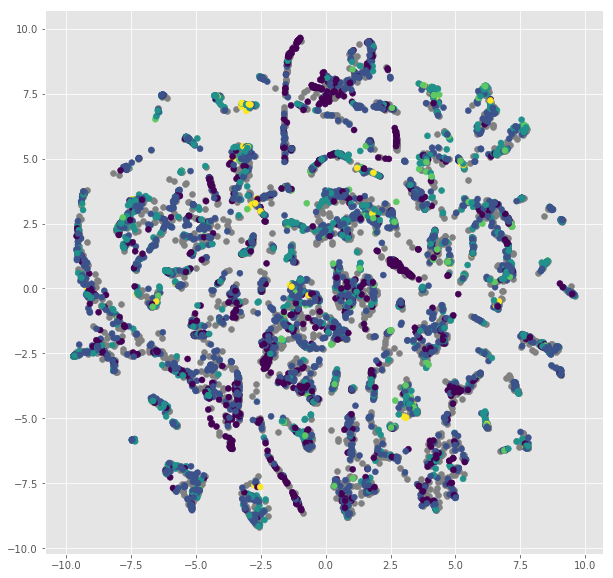

In [42]:
plt.figure(figsize=(10,10))
plt.scatter(z_data[5000:,0], z_data[5000:,1], c='gray')
plt.scatter(z_data[:5000,0], z_data[:5000,1], c=train_labels[train_mask])
plt.plot()

# Prediction

In [51]:
encoded_train = encoder.predict(train_df.as_matrix())
encoded_test = encoder.predict(test_df.as_matrix())

In [57]:
from xgboost import XGBRegressor, XGBClassifier

In [88]:
xgb = XGBClassifier(n_estimators=100)

In [96]:
train_data = encoded_train.copy()
train_y = train_labels.copy()
possible_data = encoded_test.copy()
while possible_data.shape[0] != 0:
    print train_data.shape, train_y.shape, possible_data.shape
    xgb.fit(train_data, train_y)
    pred = xgb.predict_proba(possible_data)
    selected = np.argsort(np.max(pred, axis=1))[::-1][:10000]
    train_data = np.vstack([train_data, possible_data[selected]])
    train_y = np.hstack([train_y, np.argmax(pred[selected], axis=1)])
    possible_data = np.delete(possible_data, selected, axis=0)

(34815, 32) (34815,) (138055, 32)
(44815, 32) (44815,) (128055, 32)
(54815, 32) (54815,) (118055, 32)
(64815, 32) (64815,) (108055, 32)
(74815, 32) (74815,) (98055, 32)
(84815, 32) (84815,) (88055, 32)
(94815, 32) (94815,) (78055, 32)
(104815, 32) (104815,) (68055, 32)
(114815, 32) (114815,) (58055, 32)
(124815, 32) (124815,) (48055, 32)
(134815, 32) (134815,) (38055, 32)
(144815, 32) (144815,) (28055, 32)
(154815, 32) (154815,) (18055, 32)
(164815, 32) (164815,) (8055, 32)


In [101]:
prediction2 = train_y[encoded_train.shape[0]:]

In [102]:
prediction2

array([0, 0, 0, ..., 4, 4, 2])

In [97]:
xgb_r = XGBRegressor(n_estimators=1000)
xgb_r.fit(train_data, train_y)
prediction = xgb_r.predict(encoded_test)

In [98]:
prediction

array([-0.0775733 , -0.01265937, -0.01157463, ...,  1.0409162 ,
        1.05419612,  1.14616454], dtype=float32)

In [103]:
with open('./submission_xgb_stack_semisupervised.txt', 'w') as f:
    f.write('Id,Target\n')
    for i, v in enumerate(prediction2):
        f.write('{},{}\n'.format(i+1, min(4, max(0, v))))